### On va utilisé le dataset se basant sur les données mensuelles de vente d'une société de smartphone et de gadgets.
### On dispose des dataset de ventes des 12 mois de l'années et plusieurs points de vente de l'entreprise
### On va essayé de repondre questions :


1- Quel est le mois durant lequel nous avons realisé les meilleurs chiffres d'affaire ? 

2 - Dans quel ville nous avons enregistré un maxi de commandes ?


3- En quel momment doit on faire une campagne publicitaire pour avoir plus de vente

4 - Quel produit se vend le plus ? 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import io
from google.colab import files
import missingno as msno

Collecte des datasets

In [ ]:
uploaded = files.upload()

Saving Sales_April_2019.csv to Sales_April_2019.csv
Saving Sales_August_2019.csv to Sales_August_2019.csv
Saving Sales_December_2019.csv to Sales_December_2019.csv
Saving Sales_February_2019.csv to Sales_February_2019.csv
Saving Sales_January_2019.csv to Sales_January_2019.csv
Saving Sales_July_2019.csv to Sales_July_2019.csv
Saving Sales_June_2019.csv to Sales_June_2019.csv
Saving Sales_March_2019.csv to Sales_March_2019.csv
Saving Sales_May_2019.csv to Sales_May_2019.csv
Saving Sales_November_2019.csv to Sales_November_2019.csv
Saving Sales_October_2019.csv to Sales_October_2019.csv
Saving Sales_September_2019.csv to Sales_September_2019.csv


Les rassembler dans un même dataframe

In [ ]:
! cat Sales_August_2019.csv Sales_April_2019.csv Sales_December_2019.csv Sales_February_2019.csv Sales_January_2019.csv Sales_July_2019.csv Sales_June_2019.csv Sales_March_2019.csv Sales_May_2019.csv Sales_November_2019.csv Sales_October_2019.csv Sales_September_2019.csv > all_data.csv

In [ ]:
all_data = pd.read_csv('all_data.csv')

In [ ]:
all_data.shape

(186861, 6)

In [ ]:
all_data.dtypes


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Observation des valeurs manquantes avec missingno

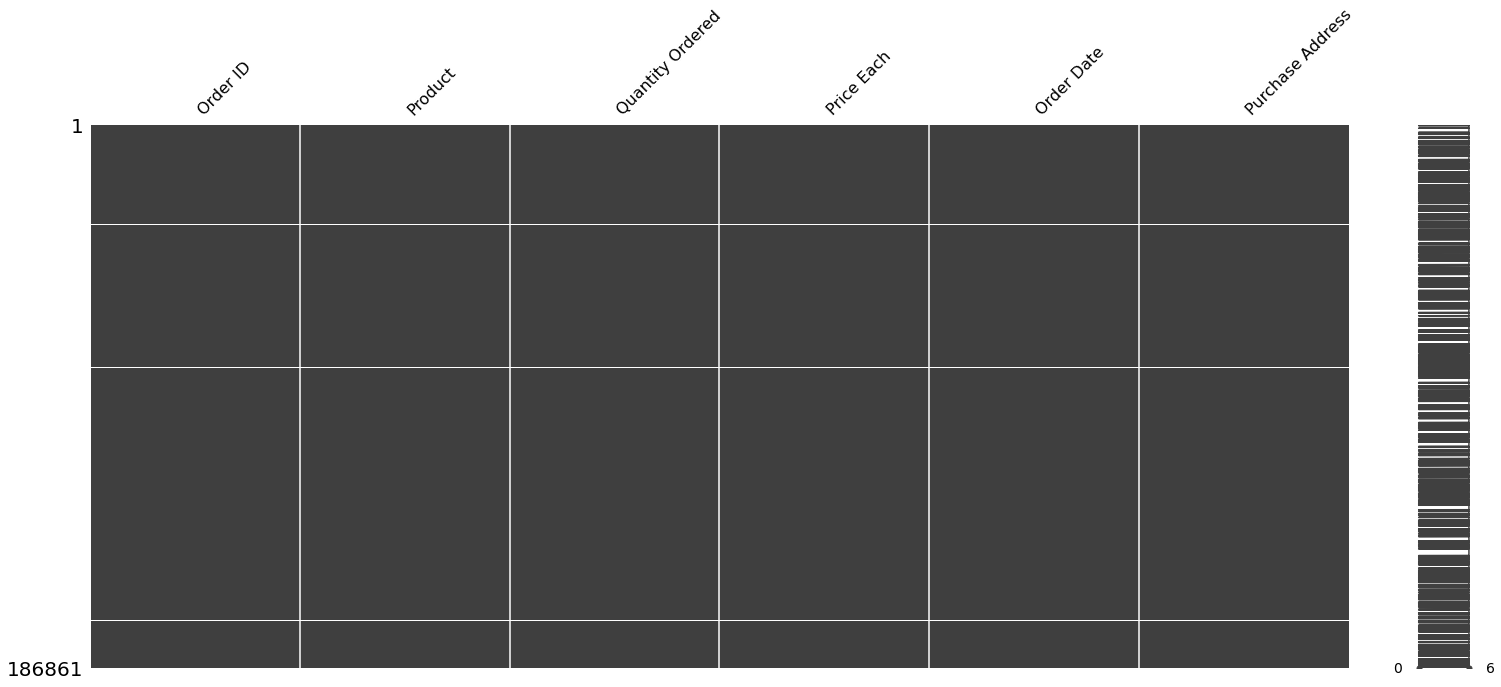

In [ ]:
msno.matrix(all_data)
plt.show()

In [ ]:
# Proceder à la suppression des valeurs manquantes 
all_data.dropna(axis=0, inplace = True)

In [ ]:
all_data.isnull().sum()
all_data.shape

(186316, 6)

On remarque l'on a plus de valeurs manquantes

# Quel est le mois durant lequel nous avons effectué le plus de vente 




In [ ]:
def month (x):
  return x.split('/')[0]

In [ ]:
all_data['Month']= all_data['Order Date'].apply(month)
all_data['Month']

0         08
1         08
2         08
3         08
4         08
          ..
186856    09
186857    09
186858    09
186859    09
186860    09
Name: Month, Length: 186316, dtype: object

In [ ]:
all_data['Month'].unique()

array(['08', 'Order Date', '09', '04', '05', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

Nous allons Enlever le "Order Date" de notre "Month"

In [ ]:
all_data = all_data[all_data['Month']!= 'Order Date']
all_data['Month'].unique()

array(['08', '09', '04', '05', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

On va changé le type de "Month" a "int"

In [ ]:
all_data['Month'].dtypes

dtype('O')

In [ ]:
all_data['Month'] = all_data['Month'].astype(int)
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [ ]:
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)

In [ ]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [ ]:
all_data['Chiffre_Affaire'] = all_data['Price Each']* all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Chiffre_Affaire
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


On va faire la somme des ventes des mois 

In [ ]:
all_data.groupby('Month')['Chiffre_Affaire'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Chiffre_Affaire, dtype: float64

On va visualiser 

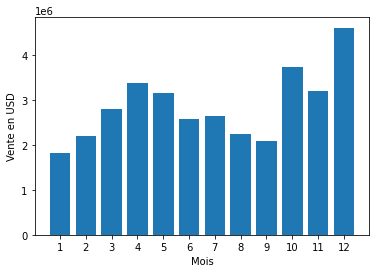

In [ ]:
months = range(1,13)
plt.bar(months, all_data.groupby('Month')['Chiffre_Affaire'].sum() )
plt.xticks(months)
plt.ylabel('Vente en USD')
plt.xlabel('Mois')
plt.show()

Le graphique nous montre que le mois de decembre est le mois où il realise le plus de vente

# Dans quel ville nous avons effecteur le maximum de commande ? 

In [ ]:
# Nous allons extraire les villes dans "Purchase Address"
def city(x):
  return x.split(',')[1]

In [ ]:
all_data['city'] =  all_data['Purchase Address'].apply(city)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Chiffre_Affaire,city
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City
...,...,...,...,...,...,...,...,...,...
186856,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186857,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186858,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186859,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [ ]:
all_data.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

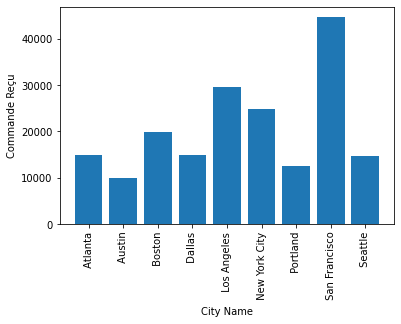

In [ ]:
plt.bar(all_data.groupby('city')['city'].count().index, all_data.groupby('city')['city'].count())
plt.xticks(rotation ='vertical')
plt.ylabel('Commande Reçu')
plt.xlabel('City Name')
plt.show()

San Francisco est la ville où le il realise le plus de commande

#En quelle moment doit-on faire des campagnes Publiciataire pour avoir plus Vente ? 

In [ ]:
# On va extraire l'heure 
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Chiffre_Affaire,city,Hour
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle,22
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas,15
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland,14
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles,20
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City,19
...,...,...,...,...,...,...,...,...,...,...
186856,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
186857,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
186858,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
186859,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [ ]:
keys = []
hours = []
for key, hour in all_data.groupby('Hour'):
  keys.append(key)
  hours.append(len(hour))
hours

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

On va visualiser ce qu'on aura

Text(0, 0.5, 'Nombre de Commandes')

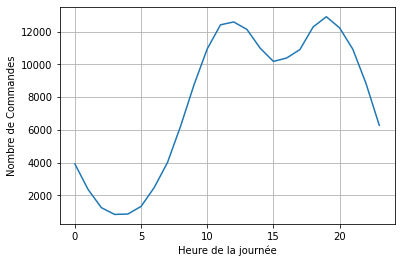

In [ ]:
plt.grid()
plt.plot(keys,hours) 
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de Commandes')

On vois qu'on enregistre plus de commande au environs de 12h à 14h puis de 17h à 19h c'est les meilleurs momment pour lancé la campagne publicitaire 

## Quel produit se vend le plus ? 

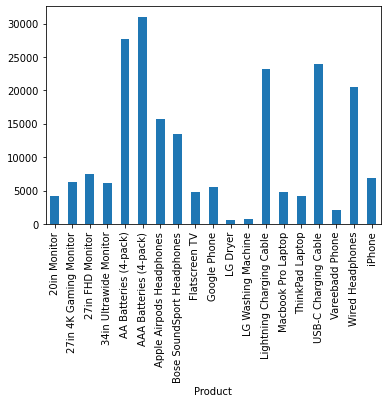

In [ ]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

Les produits qui se vendent le plus sont les batteries et les cables

In [ ]:
# on va voir si le prix à un impact sur la quantité de vente 
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

# On va faire un vusuel qui rassemble la quantité, le prix et le produit vendu en question

In [ ]:
product = all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
prices = all_data.groupby('Product')['Price Each'].mean()


[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

<Figure size 2880x144 with 0 Axes>

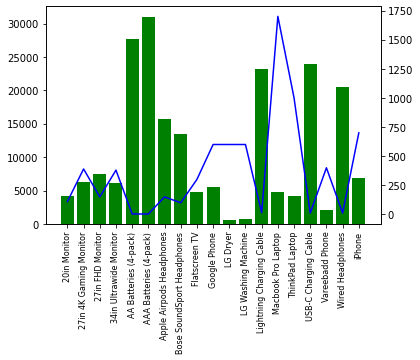

In [ ]:
plt.figure(figsize=(40,2))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(product, quantity, color='g')
ax2.plot(product, prices, 'b-')
ax1.set_xticklabels(product, rotation='vertical', size=8)

Une autre remarque ç faire est que les produits qui se vendent le plus sont les produits les moins chers

## La combianaison des produits qui se vendent le plus 

In [ ]:
# les produits qui ont le même "Order ID " ont été achété ensemble 
df = all_data[all_data['Order ID'].duplicated(keep=False)]

On va regroupe les produits qui ont été acheté ensemble en les separarnts par une virgule

In [ ]:
 df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-45-8f36d5841d75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Chiffre_Affaire,city,Hour,Grouped
46,236716,AA Batteries (4-pack),2,3.84,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco,20,"AA Batteries (4-pack),USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco,20,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco,9,"iPhone,Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco,9,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City,10,"Google Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
186803,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186814,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
186815,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
186852,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,"Google Phone,USB-C Charging Cable"


In [ ]:
# on va maintenant supprimé les valeurs dupliqué dans "Order ID"
df2= df.drop_duplicates(subset=['Order ID'])


In [ ]:
# On va voir les 5 premières combianisons les plus achetés 
df2['Grouped'].value_counts()[0:5]

iPhone,Lightning Charging Cable         882
Google Phone,USB-C Charging Cable       856
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: Grouped, dtype: int64

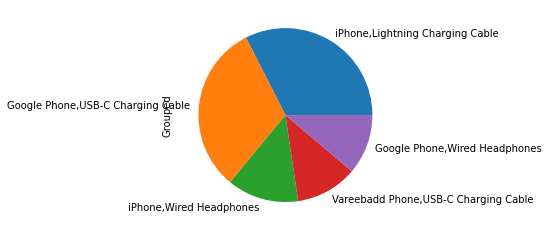

In [ ]:
# place à la visualisation
df2['Grouped'].value_counts().plot.pie()

Là pas besoin de commentaire le graphique parle seul